* This is my practice version based on a mix of my enrolled bootcamp programs.
* LinkedIn: https://www.linkedin.com/in/binh-nguyen-797319248/
* Email: binhnguyen.ibm@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data set used
salary_data = pd.read_csv('data/Salaries.csv')

## **9. Matplotlib (cont)**

* In this part, we aim to extend some fundamentals of matplotplib.

### 9.1. Alternative approachs to multiple bars and stacked bars

In [6]:
salary_data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


* If we plot a DataFrame then Matplotlib will plot all the columns. This is useful especially when we need to plot a multiple bars chart or a stacked bar charts, instead of code lines in the last notebook.
* This also means that we do not need to do `Series.plot()` multiple times, but we can use `DF.plot()`. To choose the types of graphs, we can either do `DF.plot(kind = 'plot type')` or `DF.plot.plottype()`.
* We will check and plot BasePay, OvertimePay, OtherPay according to EmployeeName.

In [8]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [9]:
# As our target columns have not been numeric yet, we need to employ pd.to_numeric to convert
# We also see that there are some NaN values in these columns, so we can employ .fillna
# We can fill with the mean value of that column for example

salary_data.BasePay = pd.to_numeric(salary_data.BasePay, errors = 'coerce')
salary_data.OvertimePay = pd.to_numeric(salary_data.OvertimePay, errors = 'coerce')
salary_data.OtherPay = pd.to_numeric(salary_data.OtherPay, errors = 'coerce')

In [10]:
salary_data.BasePay.fillna(salary_data.BasePay.mean(), inplace = True)
salary_data.OvertimePay.fillna(salary_data.OvertimePay.mean(), inplace = True)
salary_data.OtherPay.fillna(salary_data.OtherPay.mean(), inplace = True)

In [11]:
sub_df = salary_data[['EmployeeName', 'BasePay', 'OvertimePay', 'OtherPay']].iloc[:10] # take first 10 employees
sub_df

,EmployeeName,BasePay,OvertimePay,OtherPay
0,NATHANIEL FORD,167411.18,0.00,400184.25
1,GARY JIMENEZ,155966.02,245131.88,137811.38
2,ALBERT PARDINI,212739.13,106088.18,16452.60
3,CHRISTOPHER CHONG,77916.00,56120.71,198306.90
4,PATRICK GARDNER,134401.60,9737.00,182234.59
5,DAVID SULLIVAN,118602.00,8601.00,189082.74
6,ALSON LEE,92492.01,89062.90,134426.14
7,DAVID KUSHNER,256576.96,0.00,51322.50
8,MICHAEL MORRIS,176932.64,86362.68,40132.23
9,JOANNE HAYES-WHITE,285262.00,0.00,17115.73


In [12]:
# Setting EmployeeName as index is useful for this plot
sub_df.set_index('EmployeeName', inplace = True)

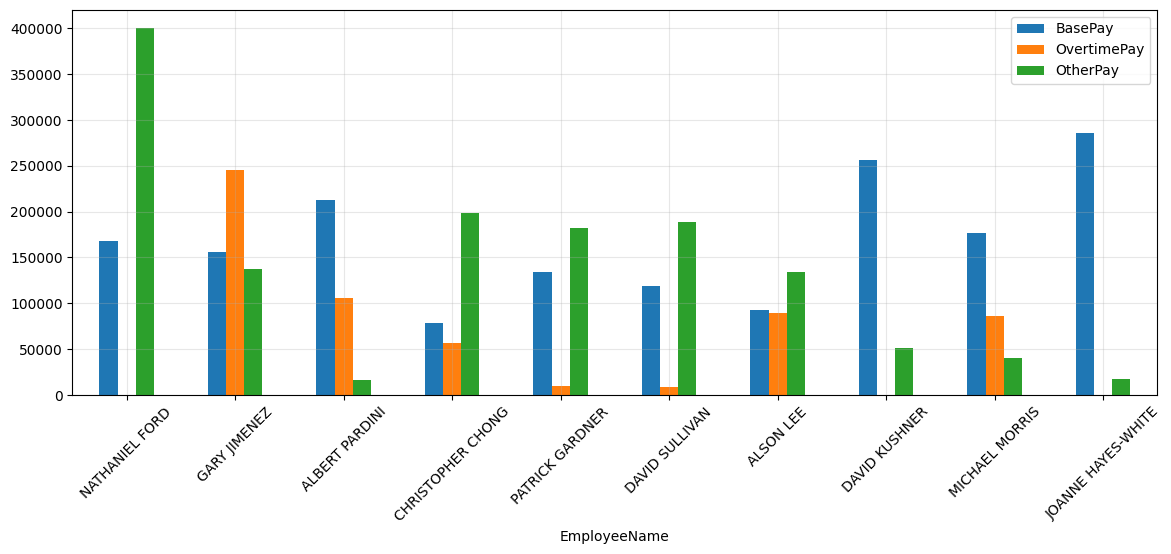

In [13]:
# Let's plot and see the output when we plot an entire DF as a bar chart
# It will automatically generate a multiple bar charts

sub_df.plot(kind = 'bar', figsize = (14, 5))
plt.xticks(rotation = 45)

plt.grid(alpha = 0.3);

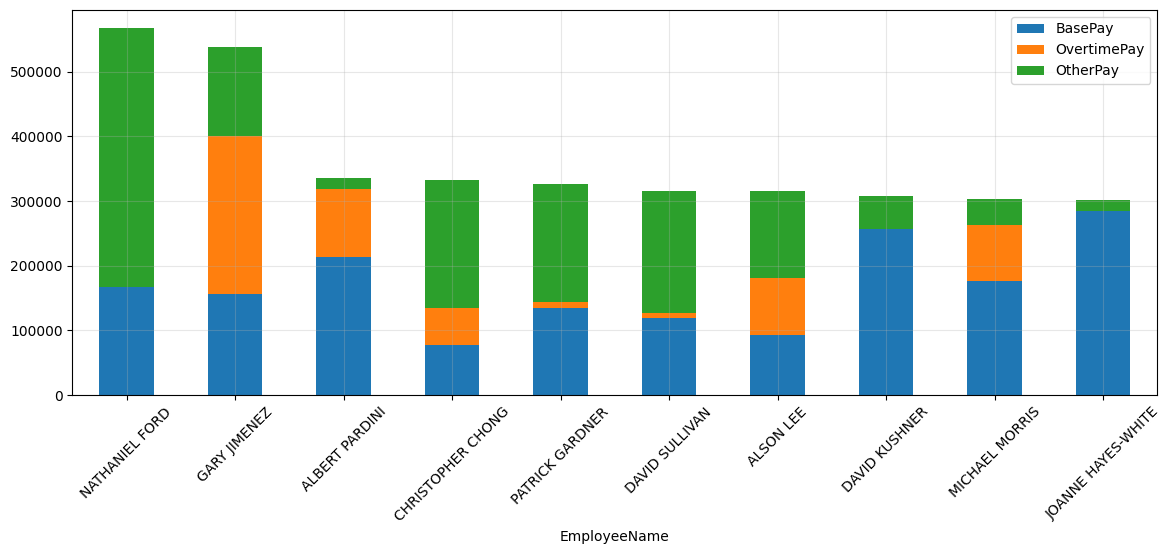

In [14]:
# In cases we need to a stacked bar chart

# Let's plot and see the output when we plot an entire DF as a bar chart
# It will automatically generate a multiple bar charts

sub_df.plot(kind = 'bar', stacked = True, figsize = (14, 5))
plt.xticks(rotation = 45)

plt.grid(alpha = 0.3);

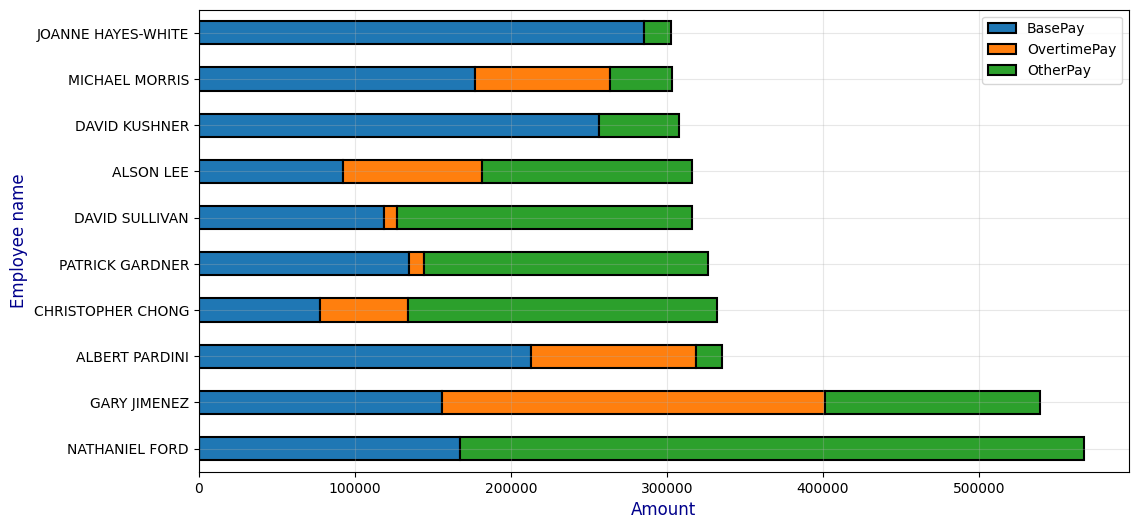

In [15]:
# Instead of writing .plot(kind = 'bar'), we can do plot.bar() or plot.barh()
# E.g. stacked horizontal bars chart

sub_df.plot.barh(stacked = True, 
                 figsize = (12, 6),
                edgecolor = 'black', # figure border color
                linewidth = 1.5)     # bar border colors

plt.xlabel('Amount', fontsize = 12, color = 'darkblue')
plt.ylabel('Employee name', fontsize = 12, color = 'darkblue')

plt.grid(alpha = 0.3);

### 9.2. Box plots

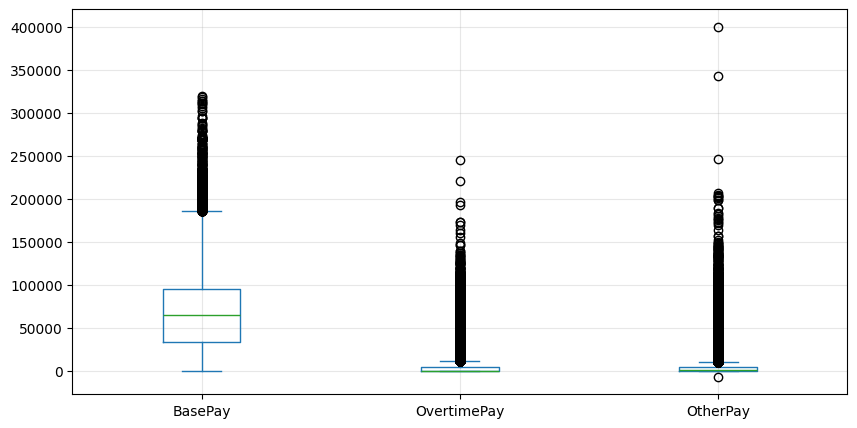

In [17]:
# It is similar as other plots; we just need to adjust the parameter 'kind' (or we can call .boxplot)
# One noteworthy parameter is showfliers = True/False; which is to display the outliers using the 1.5 * IQR rule of box plots
# For example we take all the employees, not just only 10

(
    salary_data[['EmployeeName', 'BasePay', 'OvertimePay', 'OtherPay']]
    .plot(kind = 'box', figsize = (10,5), showfliers = True))

plt.grid(alpha = 0.3)

### 9.3. Automatic subplots

* Instead of having to call `plt.subplot` many times, we can plot the entire DF and add the parameters `subplots = True`.
* In order to control the dimension of the figure, we use the parameter `layout`, e.g. `layout = (1, 3)` means 1 row x 3 columns.
* Another useful parameter when the graphs have the same x or y range is `sharex = True/False` or `sharey = True/False`. By calling this, Matplotlib will retain only one common x/y axis for all graphs.

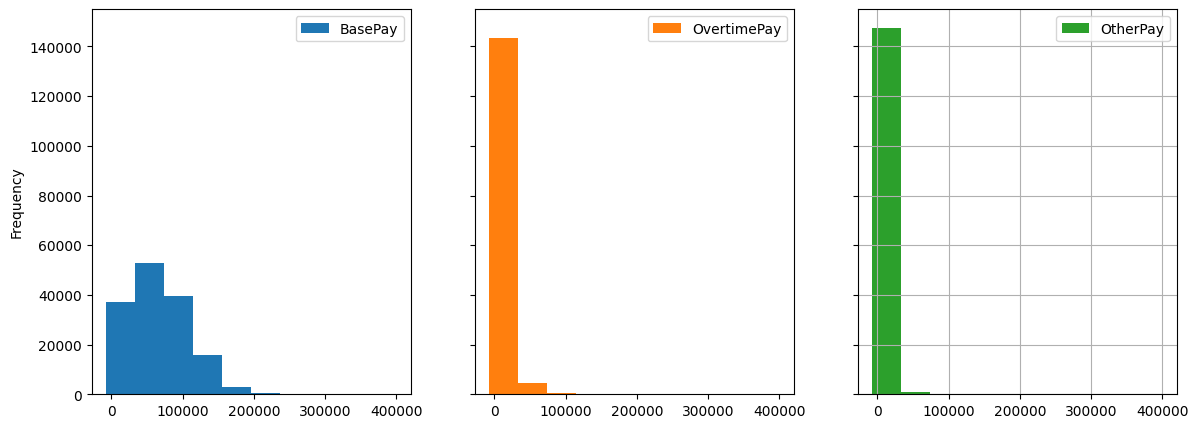

In [20]:
# Example 1

(
    salary_data[['BasePay', 'OvertimePay', 'OtherPay']]
    .plot.hist(subplots = True, 
               layout = (1, 3),
               sharey = True, 
               figsize = (14, 5))
)

plt.grid() # try to see what happens;

* We can see the `plt.grid()` is applied only on the final graph.
* In order to control each graph, we need to:
1. Assign the whole figure as a variable, for example `ax`.
2. Call `ax[x, y]` to specify the particular graph, then call the methods to adjust it. Here x is the row order, while y is the column order. Also recall that Python is zero indexing, hence the 1st one is 0.

(0.0, 100000.0)

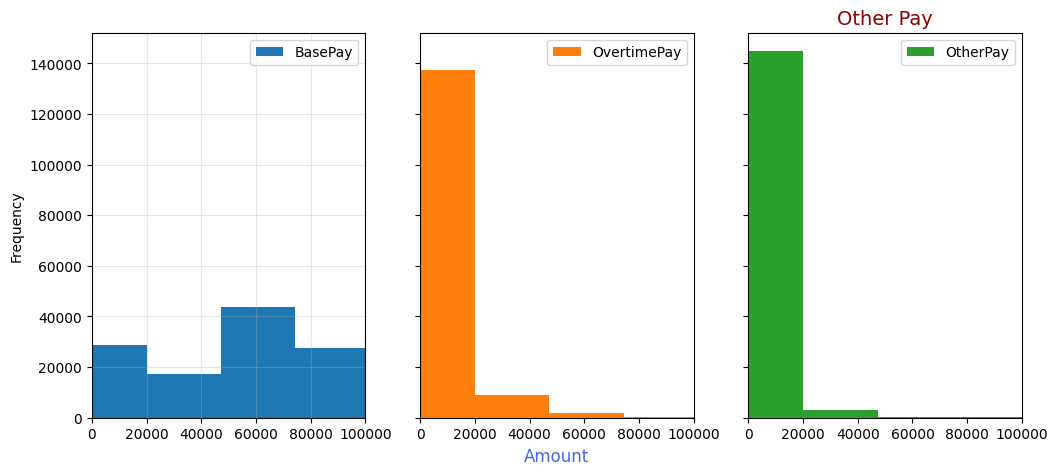

In [22]:
# Example 2

ax = ( # we need to assign the plot as a variable
    salary_data[['BasePay', 'OvertimePay', 'OtherPay']]
    .plot.hist(subplots = True, 
               layout = (1, 3),
               bins = 15,
               sharey = True, 
               figsize = (12, 5))
)

# Adjust the 1st graph
ax[0, 0].grid(alpha = 0.3)   # first row, first column --> the 1st graph
ax[0, 0].set_xlim(0, 300000)  # set the limit of x axis according to the observed range above

# Adjust the 2nd graph
ax[0, 1].set_xlabel('Amount', fontsize = 12, color = 'royalblue')   # first row, second column --> the 2nd graph
ax[0, 1].set_xlim(0, 120000) 

# Adjust the 3rd graph
ax[0, 2].set_title('Other Pay', fontsize = 14, color = 'darkred')   # first row, thrid column --> the 3rd graph
ax[0, 2].set_xlim(0, 100000) 

* A noteworthy point is that under the syntax `ax[ ].()` above, the methods are similar as in simple plt but with the prefix `set_`.

### 9.4. Manual subplots

* When we want to plot different types of plots for different subplots, then we need to plot manually.
* Now we need to assign 2 variables for the figures and axes, then calling `plt.subplots(x, y)` with x, y represents the dimensions. For example, `fig, axs = plt.subplots(2, 3)`.
* To plot each axes, we use the syntax `.plot(ax = axs[a])` with `a` represent the position of the axes.
* To adjust the whole figure, we access the variable assigned to the figure.
* To adjust each sub plot, we access the syntax, says, `axs[x, y]` that is similar to in section 9.3.

Text(0.5, 0.98, 'Practice! Practice! Practice!')

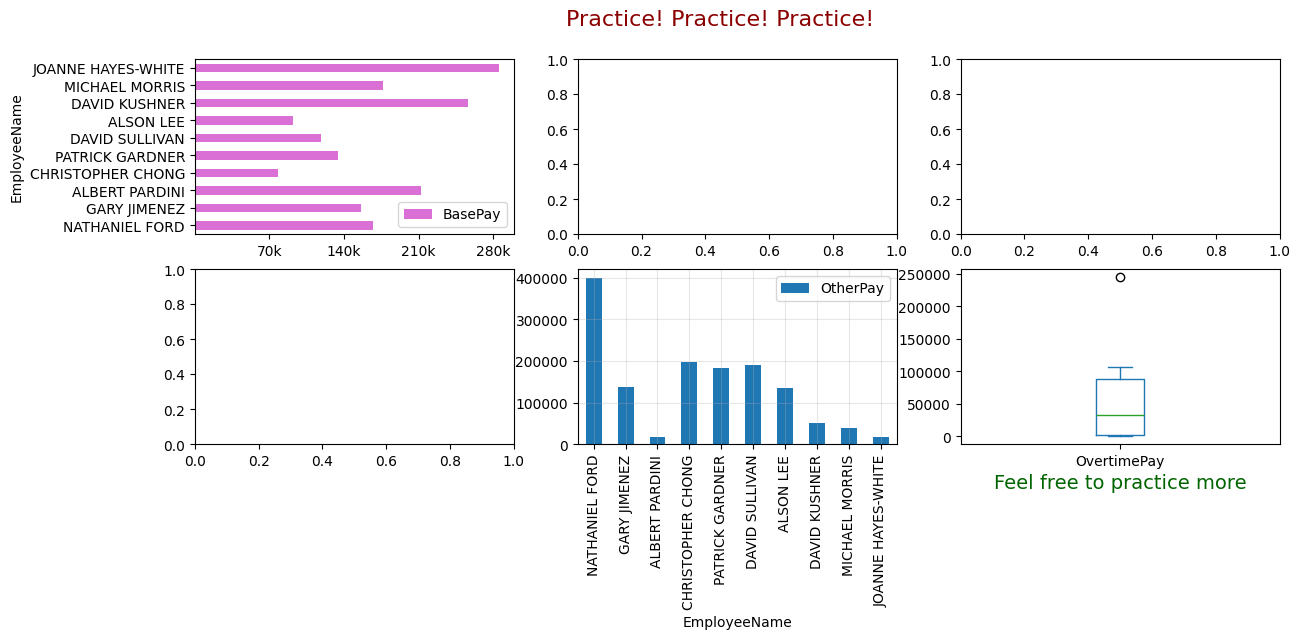

In [26]:
# Example

fig, axs = plt.subplots(2, 3, figsize = (14, 5)) # I want a figure with 2 rows and 3 columns --> 6 sub graphs in total

# Suppose that we plot all data first
sub_df[['BasePay']].plot(ax = axs[0, 0], kind = 'barh', color = 'orchid') # 1st graph on the 1st row
sub_df[['OtherPay']].plot(ax = axs[1, 1], kind = 'bar')                   # 2nd graph on the 2nd row
sub_df[['OvertimePay']].plot(ax = axs[1, 2], kind = 'box')                # 3rd graph on the 2nd row

# Then we adjust specfic sub plot
axs[0, 0].set_xticks([70000, 140000, 210000, 280000], labels = ['70k', '140k', '210k', '280k']) # 1st graph on the 1st row
axs[1, 1].grid(alpha = 0.3)                                                                     # 2nd graph on the 2nd row
axs[1, 2].set_xlabel('Feel free to practice more', color = 'darkgreen', fontsize = 14);          # 3rd graph on the 2nd row)

# Add a title to the whole figure
fig.suptitle("Practice! Practice! Practice!", fontsize = 16, color = 'darkred')

### 9.5 Export figures

* To export the figure, we add the line `plt.save_fig('Name')` and Matplotlib will export to the same folder.